### Ratings-Prediction-Project

### Problem Statement:
We have a client who has a website where people write different reviews for technical products. Now they are adding a new feature to their website i.e. the reviewer will have to add stars (ratings) as well with the review. The rating is out 5 stars and it only has 5 options available 1 star, 2 stars, 3 stars, 4 stars and 5 stars. Now they want to predict ratings for the reviews which were written in the past and they don’t have a rating. So, we have to build an application which can predict the rating by seeing the review.

### Data Collection Phase:

I have done web scraping to collect the data of customers review ratings from the well known website https://www.flipkart.com/ and https://www.amazon.com/. In this section I have scraped the reviews of different laptops, Phones, Headphones, smart watches, Professional Cameras, Printers, Monitors, Home theatre, Router from the above 2 mentioned e-commerce websites.

### Model Building Phase:
After collecting the data, we need to build a machine learning model. Before model building should do all data preprocessing steps involving NLP. Try different models with different hyper parameters and select the best model.

### Importing necessary libraries/dependencies

In [1]:
# Importing necessary libraries
import numpy as np
import pandas as pd
# Visualization
import seaborn as sns
import matplotlib.pyplot as plt
import os
import scipy as stats
# Importing nltk libraries
import nltk
import re
import string
from nltk import FreqDist
from nltk.corpus import wordnet
from scipy.sparse import hstack
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud
from nltk.stem.wordnet import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
# Evaluation Metrics
from sklearn import metrics
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import roc_curve,accuracy_score,roc_auc_score
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
# Defining different algorithms
from sklearn.svm import LinearSVC
from xgboost import XGBClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.naive_bayes import MultinomialNB
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

### Loading collected dataset

In [2]:
# Reading the csv file
df = pd.read_csv("dfrating.csv")
df

,Unnamed: 0,Review_Text,Ratings
0,0,In this price.....this phone is fantastic guys...,5.0
1,1,First impression is very good . Value for mone...,5.0
2,2,Thank you for Flipkart again for good conditio...,5.0
3,3,This is a very premium looking mobile with lar...,5.0
4,4,Good value for money product. Camera I not tha...,4.0
...,...,...,...
45926,45926,This product is nothing but overpriced hype. A...,1.0
45927,45927,Very much satisfied with the overall performan...,5.0
45928,45928,There’s a very basic issue in how the TP Link ...,2.0
45929,45929,If you have home close to 2000 Sqft this shoul...,3.0


Here I am loaded the colleced dataset which is in comma separated values (csv) format and storing it into dataframe (df) for further usage. Thus we can see first 5 and last 5 rows of the dataset. There are 45931 rows and 3 columns in the dataframe. The dataset contains categorical data and contains both dependent and indepednent variables. We have our target variable "Ratings" which stores the ratings of the customers reviews and it is categorical in nature which has multiclasses that makes this problem to be a "Classification Problem".We can see one column as Unnamed:0 which needs to be deledted as its irrelevant.

### Data description

Review_text : Content of the review text

Ratings : Ratings out of 5 stars

### Exploratory Data Analysis (EDA)

In [3]:
df.shape #checking the dimensions

(45931, 3)

Thus it shows 45931 columns ans 3 rows

In [4]:
df.columns

Index(['Unnamed: 0', 'Review_Text', 'Ratings'], dtype='object')

Thus we can see there are three columns : Unnamed:0 which needs to be deleted and review_text and ratings columns as multiclass labels.

In [5]:
# To get good overview of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45931 entries, 0 to 45930
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   45931 non-null  int64  
 1   Review_Text  45823 non-null  object 
 2   Ratings      45931 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 1.1+ MB


### Dropping the column unnamed:0

In [6]:
df.drop(columns={"Unnamed: 0"},inplace=True)

In [7]:
df

,Review_Text,Ratings
0,In this price.....this phone is fantastic guys...,5.0
1,First impression is very good . Value for mone...,5.0
2,Thank you for Flipkart again for good conditio...,5.0
3,This is a very premium looking mobile with lar...,5.0
4,Good value for money product. Camera I not tha...,4.0
...,...,...
45926,This product is nothing but overpriced hype. A...,1.0
45927,Very much satisfied with the overall performan...,5.0
45928,There’s a very basic issue in how the TP Link ...,2.0
45929,If you have home close to 2000 Sqft this shoul...,3.0


In [8]:
df.shape

(45931, 2)

Thus we see there are 45823 columns and two rows in the dataset. 

In [9]:
df['Ratings'].value_counts()

5.0    21884
1.0    11239
4.0     7257
3.0     3612
2.0     1939
Name: Ratings, dtype: int64

We see that higher number of rating given to 5 and 1 and fewer given to 4,3,2 Thus dataset is not balanced.

In [10]:
df.isnull().sum()

Review_Text    108
Ratings          0
dtype: int64

Thus we see there are some null values present in the dataset.

In [11]:
# removing null values
df.dropna(inplace=True)

<AxesSubplot:>

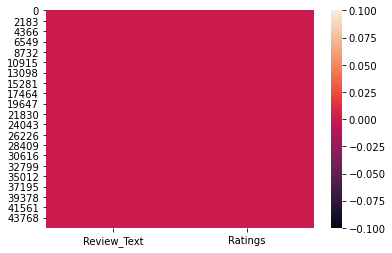

In [12]:
sns.heatmap(df.isnull()) 

In [13]:
df['Review_Text'].value_counts()

Good                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    

In [14]:
df['Ratings'].unique()

array([5., 4., 3., 2., 1.])

In [15]:
# Replacing duplicated values in the label and converting the data to integer datatype
df['Ratings'] = df['Ratings'].replace('1.0',1)
df['Ratings'] = df['Ratings'].replace('2.0',2)
df['Ratings'] = df['Ratings'].replace('3.0',3)
df['Ratings'] = df['Ratings'].replace('4.0',4)
df['Ratings'] = df['Ratings'].replace('5.0',5)
df['Ratings'] = df['Ratings'].astype('int')

In [16]:
df['Ratings'].unique()

array([5, 4, 3, 2, 1])

In [17]:
#printing unique features
print("Total number of unique values in each feature:")
for col in df.columns.values:
    print("Number of unique values of {} : {}".format(col, df[col].nunique()))

Total number of unique values in each feature:
Number of unique values of Review_Text : 7673
Number of unique values of Ratings : 5


Thus we there are 5 ratings

In [18]:
df['Review_Text'][0]

"In this price.....this phone is fantastic guys\n\nBattery is massive 😍\nScreen is excellent ...,.... Camera is average but not bad in this price u don't get everything perfect. ( Look pictures which is taken from the same phone )\n6000 mAh battery , 90Ghz smooth refresh rate. 10 Watt charger takes more time to charge but its ok with 2 days battery life."

In [19]:
df['Review_Text'][1]

'First impression is very good . Value for money smartphone\nMust buy phone for those who wants an all rounder phone in tight(less) budget . Battery , Procesaor , Screen is far good from its price but camera is okay with lots of features like timelapse and slowmo .'

### Text Preprocessing

Using the text preprocessing techniques we can remove noise from raw data and makes raw data more valuable for building models. Pre-processing involves the following steps, but these will be performed in a slightly different manner:

Text case conversion

Removing Punctuations and other special characters

Splitting the comments into individual words

Removing Stop Words

Stemming and Lemmatization

Text Standardization-Normalization

Splitting dataset into Training and Testing

In [20]:
# Creating new column for length of Reviews
df['original_length']=df.Review_Text.str.len()
df

,Review_Text,Ratings,original_length
0,In this price.....this phone is fantastic guys...,5,351
1,First impression is very good . Value for mone...,5,263
2,Thank you for Flipkart again for good conditio...,5,102
3,This is a very premium looking mobile with lar...,5,510
4,Good value for money product. Camera I not tha...,4,177
...,...,...,...
45926,This product is nothing but overpriced hype. A...,1,465
45927,Very much satisfied with the overall performan...,5,308
45928,There’s a very basic issue in how the TP Link ...,2,906
45929,If you have home close to 2000 Sqft this shoul...,3,1594


In [21]:
#So first defining  a function to replace some of the abbreviations to their full form and removing urls and some unwanted text 
def decontracted(text):
    text = re.sub(r"won't", "will not", text)
    text = re.sub(r"don’t", "do not", text)
    text = re.sub(r"can't", "can not", text)
    text = re.sub(r"im ", "i am", text)
    text = re.sub(r"yo ", "you ",text)
    text = re.sub(r"doesn’t", "does not",text)
    text = re.sub(r"n\'t", " not", text)
    text = re.sub(r"\'re", " are", text)
    text = re.sub(r"\'s", " is", text)
    text = re.sub(r"\'d", " would", text)
    text = re.sub(r"\'ll", " will", text)
    text = re.sub(r"\'t", " not", text)
    text = re.sub(r"\'ve", " have", text)
    text = re.sub(r"\'m", " am", text)
    text = re.sub(r"<br>", " ", text)
    text = re.sub(r'http\S+', '', text) #removing urls
    return text

# Changing all words to there Lowercase
df['Review_Text'] = df['Review_Text'].apply(lambda x : x.lower())

df['Review_Text'] = df['Review_Text'].apply(lambda x : decontracted(x))

# Removing punctuations
df['Review_Text'] = df['Review_Text'].str.replace('[^\w\s]','')
df['Review_Text'] = df['Review_Text'].str.replace('\n','')

# Changing all words to there Lowercase
df['Review_Text'] = df['Review_Text'].apply(lambda x : x.lower())

df['Review_Text'] = df['Review_Text'].apply(lambda x : decontracted(x))

# Removing punctuations
df['Review_Text'] = df['Review_Text'].str.replace('[^\w\s]','')
df['Review_Text'] = df['Review_Text'].str.replace('\n','')

### Let's have a look into our text again:

In [22]:
# Checking data of first row in Review column again
df['Review_Text'][0]

'in this pricethis phone is fantastic guysbattery is massive screen is excellent  camera is average but not bad in this price u do not get everything perfect  look pictures which is taken from the same phone 6000 mah battery  90ghz smooth refresh rate 10 watt charger takes more time to charge but its ok with 2 days battery life'

### Removing StopWords:

In [23]:
# Removing stopwords
stop = stopwords.words('english')
df['Review_Text'] = df['Review_Text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

# Checking the text data again
df['Review_Text'][0]

'pricethis phone fantastic guysbattery massive screen excellent camera average bad price u get everything perfect look pictures taken phone 6000 mah battery 90ghz smooth refresh rate 10 watt charger takes time charge ok 2 days battery life'

### Now we have removed all stop words from the text data.

### Lemmatization and stemming with Snowball

Stemming is the process of converting inflected/derived words to their word stem or the root form. Basically, a large number of similar origin words are converted to the same word.E.g. words like "stems", "stemmer", "stemming", "stemmed" as based on "stem". This helps in achieving the training process with a better accuracy.

Lemmatizing is the process of grouping together the inflected forms of a word so they can be analysed as a single item. This is quite similar to stemming in its working but differs since it depends on correctly identifying the intended part of speech and meaning of a word in a sentence, as well as within the larger context surrounding that sentence, such as neighboring sentences or even an entire document.

In [24]:
# Defining function to convert nltk tag to wordnet tags
def nltk_tag_to_wordnet_tag(nltk_tag):
    if nltk_tag.startswith('J'):
        return wordnet.ADJ
    elif nltk_tag.startswith('V'):
        return wordnet.VERB
    elif nltk_tag.startswith('N'):
        return wordnet.NOUN
    elif nltk_tag.startswith('R'):
        return wordnet.ADV
    else:
        return None

In [25]:
lemmatizer = nltk.stem.WordNetLemmatizer()

In [26]:
#defining function to lemmatize our text
def lemmatize_sentence(sentence):
    #tokenize the sentence & find the pos tag
    nltk_tagged = nltk.pos_tag(nltk.word_tokenize(sentence))
    #tuple of (token, wordnet_tag)
    wordnet_tagged = map(lambda x : (x[0], nltk_tag_to_wordnet_tag(x[1])), nltk_tagged)
    lemmatize_sentence = []
    for word, tag in wordnet_tagged:
        if tag is None:
            lemmatize_sentence.append(word)
        else:
            lemmatize_sentence.append(lemmatizer.lemmatize(word,tag))
    return " ".join(lemmatize_sentence)

In [27]:
import nltk
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\91845\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [28]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\91845\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [29]:
df['Review_Text'] = df['Review_Text'].apply(lambda x : lemmatize_sentence(x))

### Text Normalization-Standardization

Let's remove all the noise data which is present in the text

In [30]:
# Removing noise data from the text
def noise_words(text):
    # Remove html markup
    text = re.sub("(<.*?>)", "", text)
    # Remove non-ASCII and digits
    text = re.sub("(\\W)", " ", text)
    text = re.sub("(\\d)", "", text)
    # Remove white space
    text = text.strip()
    return text

In [31]:
df['Review_Text'] = df['Review_Text'].apply(lambda x : noise_words(x))

By defining function noise_words ,it will remove the noise from the text. It will remove any html markups, digits,urls and white spaces from the text. Let's have a look at first two rows of the text :

In [32]:
df['Review_Text'][0]

'pricethis phone fantastic guysbattery massive screen excellent camera average bad price u get everything perfect look picture take phone  mah battery ghz smooth refresh rate  watt charger take time charge ok  day battery life'

In [33]:
df['Review_Text'][1]

'first impression good value money smartphonemust buy phone want rounder phone tightless budget battery procesaor screen far good price camera okay lots feature like timelapse slowmo'

As we can observe all the text has been converted to lower case and removed irrelevant words, punctuations, stop words etc.

### Count of words in the text

In [34]:
# Creating column for word counts in the text
df['Review_word_count'] = df['Review_Text'].apply(lambda x: len(str(x).split(' ')))
df[['Review_word_count','Review_Text']].head()

,Review_word_count,Review_Text
0,37,pricethis phone fantastic guysbattery massive ...
1,26,first impression good value money smartphonemu...
2,13,thank flipkart good condition mobile infinite ...
3,49,premium look mobile large display without notc...
4,16,good value money product camera good complain ...


In [35]:
# New column (clean_length) after removing punctuations, stopwords in dataset
df['clean_length'] =df.Review_Text.str.len()
df

,Review_Text,Ratings,original_length,Review_word_count,clean_length
0,pricethis phone fantastic guysbattery massive ...,5,351,37,225
1,first impression good value money smartphonemu...,5,263,26,181
2,thank flipkart good condition mobile infinite ...,5,102,13,65
3,premium look mobile large display without notc...,5,510,49,332
4,good value money product camera good complain ...,4,177,16,114
...,...,...,...,...,...
45926,product nothing overprice hype regular range e...,1,465,45,284
45927,much satisfy overall performance work like fla...,5,308,33,214
45928,there basic issue tp link decos work mesh syst...,2,906,90,589
45929,home close sqft setup really simple ppoe conn...,3,1594,151,932


In [36]:
# Checking the percentage of length cleaned
print(f"Total Original Length        : {df.original_length.sum()}")
print(f"Total Cleaned Length         : {df.clean_length.sum()}")
print(f"Percentage of Length Cleaned : {(df.original_length.sum()-df.clean_length.sum())*100/df.original_length.sum()}%")

Total Original Length        : 19730066
Total Cleaned Length         : 12237206
Percentage of Length Cleaned : 37.97686231764253%


In [37]:
# Statistical summary of dataset
df.describe()

,Ratings,original_length,Review_word_count,clean_length
count,45823.000000,45823.000000,45823.000000,45823.000000
mean,3.581062,430.571242,41.686664,267.053794
std,1.657023,584.531151,55.442560,356.699817
min,1.000000,2.000000,1.000000,2.000000
25%,2.000000,62.000000,7.000000,40.000000
50%,4.000000,259.000000,25.000000,160.000000
75%,5.000000,511.000000,51.000000,330.000000
max,5.000000,3910.000000,392.000000,2546.000000


Observation:
1)The counts of every column is same which means there are no missing values present in the dataset.

2)The mean value is greater than the median in all the columns except the column Ratings. So, the data in these columns are skewed to right and in target it is skewed to left.

3)There is a huge difference between 75% percentile and max values in original_length and clean_length ,so, we can say there are some outliers present in the data.

### Visualizations
Target Variable "Ratings"

5    21842
1    11183
4     7247
3     3612
2     1939
Name: Ratings, dtype: int64


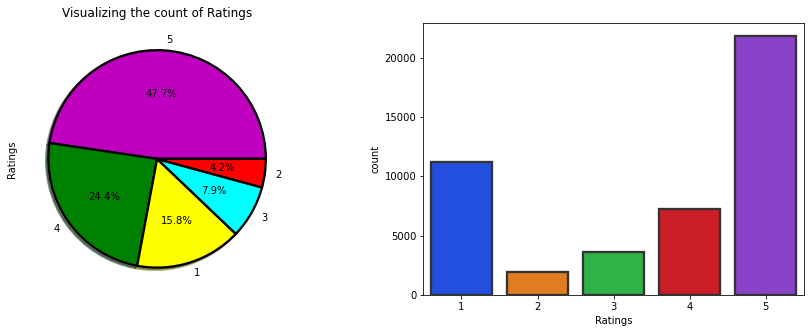

In [38]:
# Visualizing the target variable
print(df['Ratings'].value_counts())
f,ax=plt.subplots(1,2,figsize=(15,5))
labels = ['5', '4', '1', '3', '2']
colors = ["m", "green", "yellow", "cyan", "red"]
df['Ratings'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[0],shadow=True,labels=labels,fontsize=10,colors=colors,
                                              wedgeprops = {'linewidth':2.3, 'edgecolor':'k'},
                                              title = 'Visualizing the count of Ratings')
ax = sns.countplot('Ratings', data=df, ax=ax[1],palette="bright",linewidth=2.3, edgecolor=".2")
plt.show()

Thus ,we have an idea that more of the customers review pointed towrds 5 star compared followed by 1 star and least is 2 star .Around 47.7% of the texts are rated as 5 and only 4.2% of the texts rated as 2 stars.So, we can say that this is an "imbalance problem" which we need to make it balance to build our model.

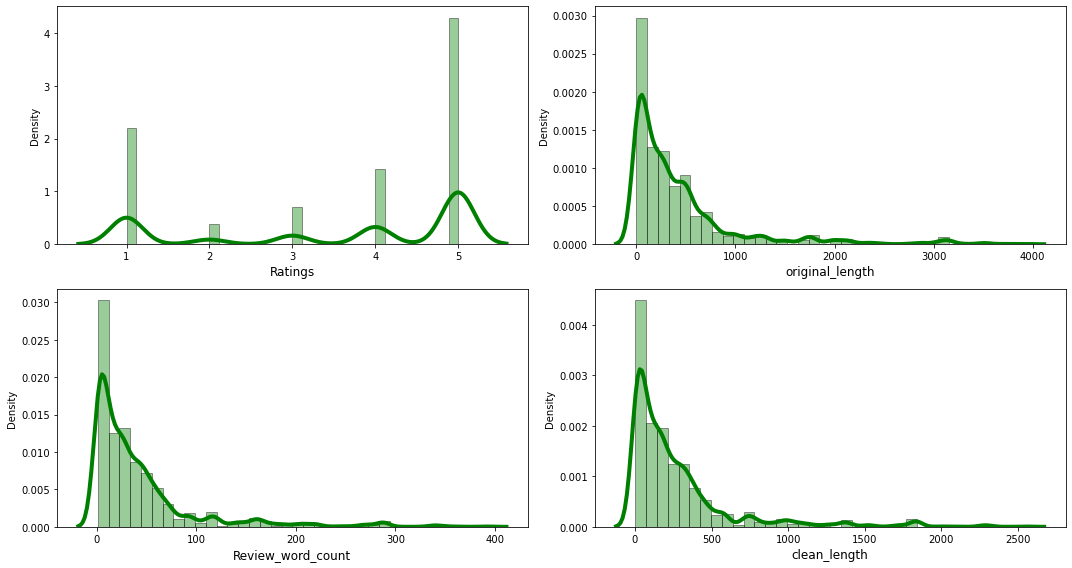

In [39]:
# Checking how the data has been distriubted in each column using histogram and density plots
col = ["Ratings","original_length","Review_word_count","clean_length"]
plt.figure(figsize=(15,8),facecolor='white')
plotnumber=1
for column in col:
    if plotnumber<=4:
        ax=plt.subplot(2,2,plotnumber)
        sns.distplot(df[column],color="green",hist=True, kde = True,bins = int(180/5),hist_kws = {'edgecolor':'black'},
            kde_kws = {'linewidth':4})
        plt.xlabel(column,fontsize=12)
    plotnumber+=1
plt.tight_layout()

From the dist plot we can notice that data in all the columns are skewed to right except the target column. Which means the mean value is greater than the median in these columns.

The plot of Review_word_count shows that most of the text is having the no. of words in the range of 0 to 200,some of the text beyond acts as outlier.

Also, the plot of clean_length shows that  most of our text is having the number of words in the range of 0 to 500, and some of the text are too lengthy which are out of range which acts as outliers in our data.

Since there is skewness in the data we need to remove it before building the machine learning models.

### Identifying Outiers

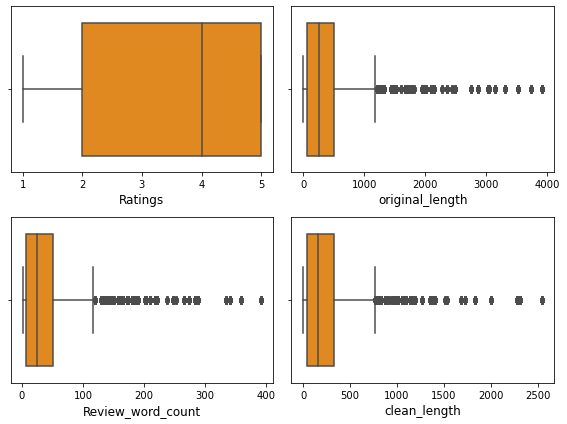

In [40]:
# Checking how the data has been distriubted in each column using histogram and density plots
col = ["Ratings","original_length","Review_word_count","clean_length"]
plt.figure(figsize=(8,6),facecolor='white')
plotnumber=1
for column in col:
    if plotnumber<=4:
        ax=plt.subplot(2,2,plotnumber)
        sns.boxplot(df[column],color="darkorange")
        plt.xlabel(column,fontsize=12)
    plotnumber+=1
plt.tight_layout()

As we can observe all the coluns contains outliers except the target column that is "Ratings". Let's remove the outliers using appropriate techniques.

### Removing outliers

1. Zscore method

In [41]:
# Features containing outliers
features = df[['original_length', 'Review_word_count', 'clean_length']]
               
# Using zscore to remove outliers               
from scipy.stats import zscore

z=np.abs(zscore(features))
z

array([[0.1361298 , 0.0845328 , 0.11789816],
       [0.28667945, 0.2829385 , 0.24125253],
       [0.56211688, 0.51741797, 0.5664595 ],
       ...,
       [0.81335947, 0.87142193, 0.90257887],
       [1.99038401, 1.97167173, 1.86418223],
       [2.36504734, 2.36848313, 2.43329443]])

In [42]:
# Creating new dataframe by setting z to 3
df_new = df[(z<3).all(axis=1)] 
df_new

,Review_Text,Ratings,original_length,Review_word_count,clean_length
0,pricethis phone fantastic guysbattery massive ...,5,351,37,225
1,first impression good value money smartphonemu...,5,263,26,181
2,thank flipkart good condition mobile infinite ...,5,102,13,65
3,premium look mobile large display without notc...,5,510,49,332
4,good value money product camera good complain ...,4,177,16,114
...,...,...,...,...,...
45926,product nothing overprice hype regular range e...,1,465,45,284
45927,much satisfy overall performance work like fla...,5,308,33,214
45928,there basic issue tp link decos work mesh syst...,2,906,90,589
45929,home close sqft setup really simple ppoe conn...,3,1594,151,932


This is the new dataframe after removing the outliers. 

In [43]:
print ("Dataframe Shape before removing outliers: ", df.shape)
print ("Dataframe Shape after removing outliers: ", df_new.shape)
print ("Percentage of data loss after outlier removal: ", (df.shape[0]-df_new.shape[0])/df.shape[0]*100)

Dataframe Shape before removing outliers:  (45823, 5)
Dataframe Shape after removing outliers:  (44349, 5)
Percentage of data loss after outlier removal:  3.2167252253235272


Thus using threshold as 3 ,the data loss was 3.2% which is acceptable.

# Checking for skewness in dataset

In [44]:
# Checking the skewness
df_new.skew()

Ratings             -0.680366
original_length      1.884796
Review_word_count    1.877943
clean_length         1.842307
dtype: float64

Here we can observe the skewness present in all the columns. But Ratings column is our target and it has categorical data so no need to remove skewness in this column. Let's remove skewness in the remaining columns using yeo-johnson method.

### Removing skewness using yeo-johnson method

In [45]:
# Removing skewness using yeo-johnson  method to get better prediction
features= ['original_length', 'Review_word_count', 'clean_length']

from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='yeo-johnson')

In [46]:
df_new[features] = scaler.fit_transform(df_new[features].values)
df_new[features]

,original_length,Review_word_count,clean_length
0,0.437026,0.514068,0.451880
1,0.204475,0.208667,0.266891
2,-0.464822,-0.341668,-0.497386
3,0.760117,0.769281,0.804464
4,-0.092070,-0.183819,-0.098933
...,...,...,...
45926,0.677830,0.690780,0.659467
45927,0.329954,0.413187,0.408513
45928,1.309904,1.358647,1.379275
45929,1.919820,1.901168,1.891546


In [47]:
# Checking skewness after using yeo-johnson method
df_new[features].skew()

original_length     -0.092758
Review_word_count   -0.048260
clean_length        -0.082952
dtype: float64

We can notice there is no skewness in the data after using yeo-johnson method. Let's visualize the distribution of data after removing outliers and skewness.

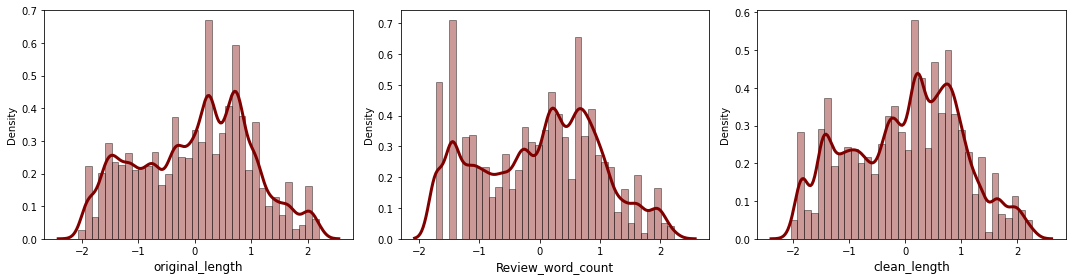

In [48]:
# Checking how the data has been distriubted in each column 
col = ["original_length","Review_word_count","clean_length"]
plt.figure(figsize=(15,4),facecolor='white')
plotnumber=1
for column in col:
    if plotnumber<=3:
        ax=plt.subplot(1,3,plotnumber)
        sns.distplot(df_new[column],color="maroon",hist=True, kde = True,bins = int(180/5),hist_kws = {'edgecolor':'black'},
            kde_kws = {'linewidth':3})
        plt.xlabel(column,fontsize=12)
    plotnumber+=1
plt.tight_layout()

the data looks almost normal after removing the skewness compared to the previous data.

# Checking for correlation in dataset

In [49]:
# Checking the correlation between features and the target
cor = df_new.corr()
cor

,Ratings,original_length,Review_word_count,clean_length
Ratings,1.000000,-0.165906,-0.154470,-0.149297
original_length,-0.165906,1.000000,0.993979,0.995434
Review_word_count,-0.154470,0.993979,1.000000,0.995480
clean_length,-0.149297,0.995434,0.995480,1.000000


This gives the correlation between the denpendent and independent variables. We can visualize this by plotting heat map.

# Visualizing the correlation matrix by plotting heat map.

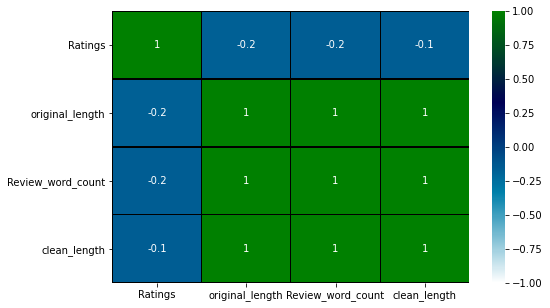

In [50]:
# Visualizing the correlation matrix by plotting heat map.
plt.figure(figsize=(8,5))    
sns.heatmap(df_new.corr(),linewidths=.1,vmin=-1, vmax=1,fmt='.1g',linecolor="black",annot=True,cmap="ocean_r",
            annot_kws={'size':10})
plt.yticks(rotation=0);

The heat map gives the correlation between features and label. We can also observe the correlation between one feature to another.

### Top 30 most frequently occuring words:

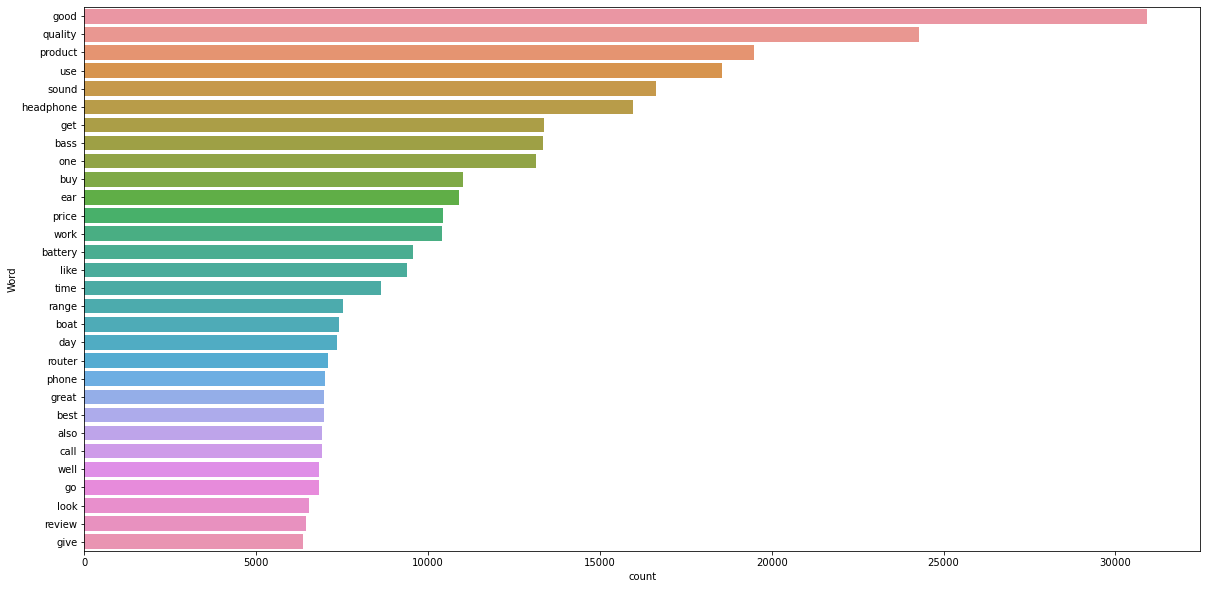

In [51]:
#function to plot most frequent terms
def freq_words(x, terms = 30):
    all_words = ' '.join([text for text in x])
    all_words = all_words.split()
    fdist = FreqDist(all_words)
    words_df = pd.DataFrame({'word':list(fdist.keys()),
                             'count':list(fdist.values())})
    #selecting top 30 most freq words
    d = words_df.nlargest(columns = 'count', n = terms)
    plt.figure(figsize = (20,10))
    ax = sns.barplot(data = d, x='count', y='word')
    ax.set(ylabel = 'Word')
    plt.show()
    
freq_words(df_new['Review_Text'])  

### WORDCLOUD

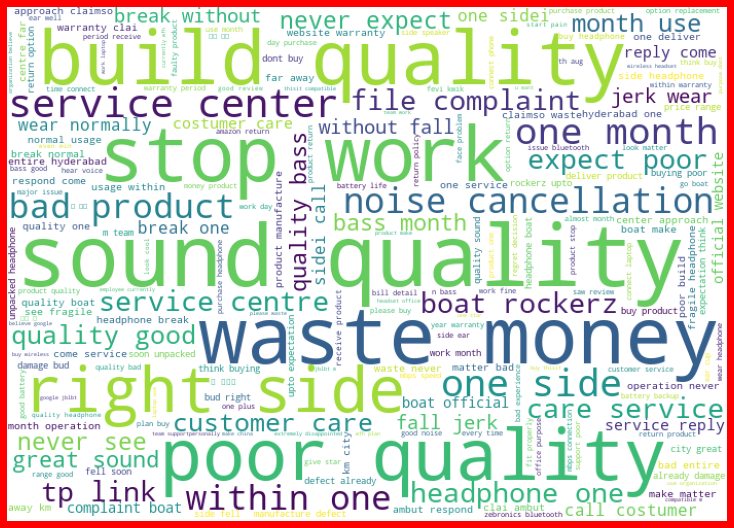

In [52]:
''' Rating 1 '''

from wordcloud import WordCloud
one = df_new['Review_Text'][df_new['Ratings']==1]

one_cloud = WordCloud(width=700,height=500,background_color='white',max_words=200).generate(' '.join(one))

plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(one_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

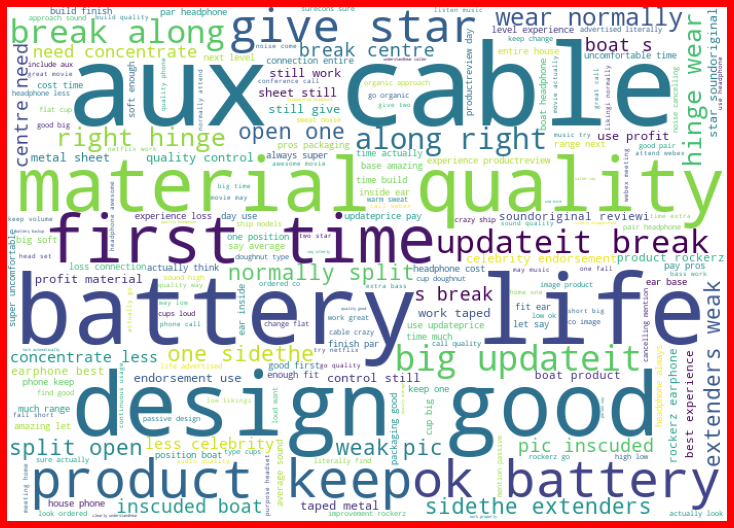

In [53]:
''' Rating 2 '''
    
    
one = df['Review_Text'][df['Ratings']==2]

one_cloud = WordCloud(width=700,height=500,background_color='white',max_words=200).generate(' '.join(one))

plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(one_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

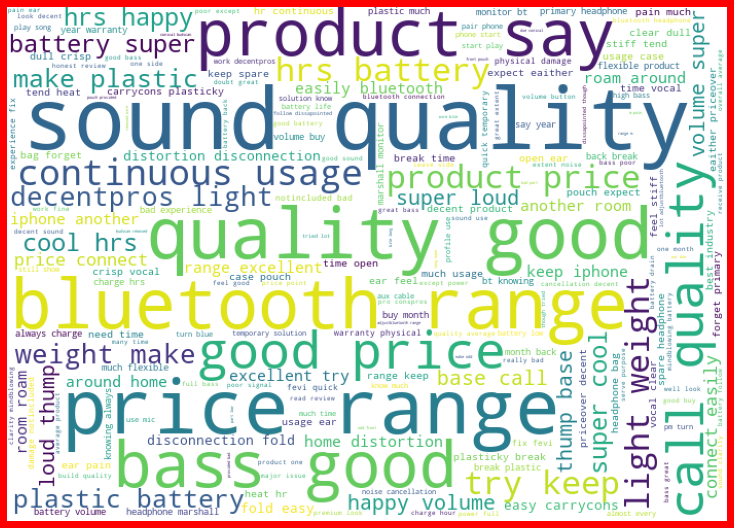

In [54]:
''' Rating 3 '''
    
    
one = df['Review_Text'][df['Ratings']==3]

one_cloud = WordCloud(width=700,height=500,background_color='white',max_words=200).generate(' '.join(one))

plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(one_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

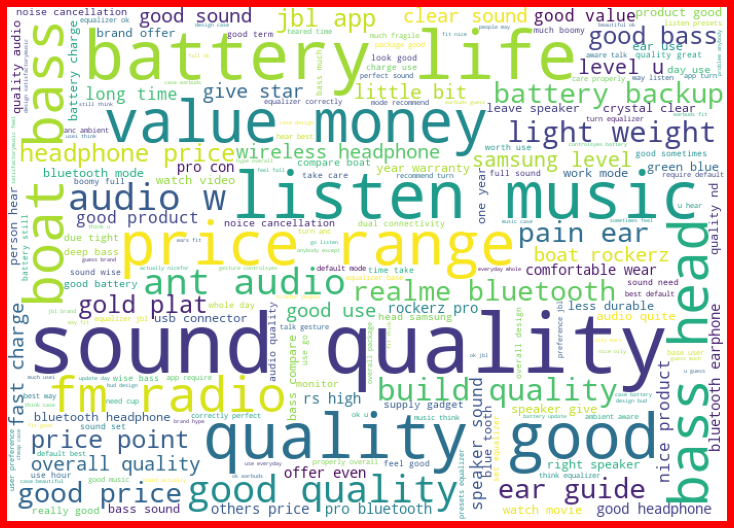

In [55]:
''' Rating 4 '''
    
    
one = df['Review_Text'][df['Ratings']==4]

one_cloud = WordCloud(width=700,height=500,background_color='white',max_words=200).generate(' '.join(one))

plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(one_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

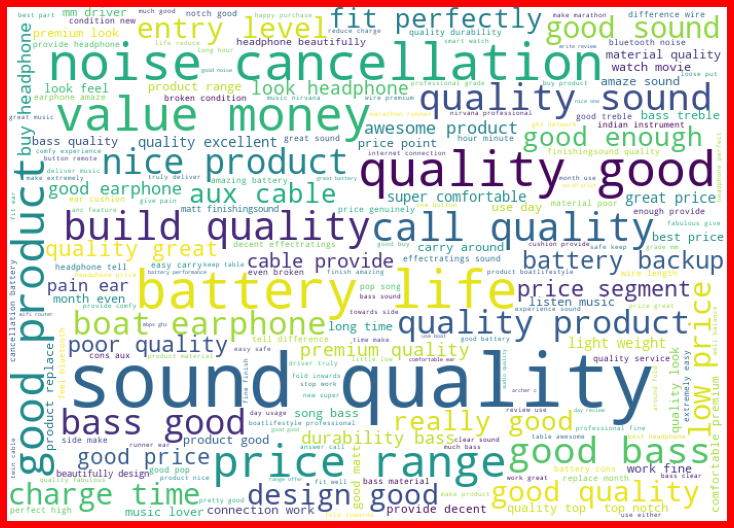

In [56]:
''' Rating 5 '''
    
    
one = df['Review_Text'][df['Ratings']==5]

one_cloud = WordCloud(width=700,height=500,background_color='white',max_words=200).generate(' '.join(one))

plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(one_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

# Separating features and label into X and y

In [57]:
# Separating features and labels
x = df['Review_Text']
y = df['Ratings']

# Converting tokens into vectors 

In [58]:
# Using the n_gram tfidf vectorizer(Word vectors)
word_vectorizer = TfidfVectorizer(
                                sublinear_tf = True,
                                analyzer = 'word',
                                token_pattern = r'\w{1,}',
                                stop_words = 'english',
                                ngram_range = (1,3),
                                strip_accents = 'unicode',
                                max_features = 100000)
word_vectorizer.fit(x)
train_word_features = word_vectorizer.transform(x)

In [59]:
# Character vectors
char_vectorizer = TfidfVectorizer(
                                sublinear_tf = True,
                                strip_accents = 'unicode',
                                analyzer = 'char',
                                stop_words = 'english',
                                ngram_range = (2,6),
                                max_features = 50000)
char_vectorizer.fit(x)
train_char_features = char_vectorizer.transform(x)

In [60]:
# I will combine both word vectors and character vectors as input for our model
X = hstack([train_char_features,train_word_features])

I have performed TfIdf vectorizer to convert words and characters into vectors to use them as an input to our model. I have converted features into number tokens in the dataset. And separated input and output variables.

# Machine Learning Model Building and Evaluation Metrics

# Splitting train and test  data

In [61]:
# Splitting training and testing data 
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [62]:
# Checking the dimension of train and test after splitting
print(x_train.shape,'\t',x_test.shape)        # Shape of x data
print(y_train.shape,'\t',y_test.shape)        # Shape of y data

(32076, 150000) 	 (13747, 150000)
(32076,) 	 (13747,)


Balancing data using oversampling technique
From the visualization we have seen there is class imbalance issue, let's balance the data using oversampling method.

In [63]:
# Let's check the number of classes before fit
from collections import Counter
print("Count of classes before fit {}".format(Counter(y_train)))

Count of classes before fit Counter({5: 15305, 1: 7799, 4: 5076, 3: 2540, 2: 1356})


Here we have the maximum count 15305 for rating 5, I am using this count to get the balanced data ensuring all the entries to be having the same count of 15305.

In [64]:
# Oversample and plot imbalanced dataset with SMOTE
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE

# Transform the dataset
os=SMOTE(sampling_strategy = {1: 15305, 2: 15305, 3: 15305, 4: 15305, 5: 15305})
x_train_os,y_train_os=os.fit_resample(x_train,y_train)

print("Count of classes before fit{}".format(Counter(y_train)))
print("Count of classes after fit {}".format(Counter(y_train_os)))

Count of classes before fitCounter({5: 15305, 1: 7799, 4: 5076, 3: 2540, 2: 1356})
Count of classes after fit Counter({1: 15305, 5: 15305, 4: 15305, 2: 15305, 3: 15305})


"SMOTE" is the oversampling mechanism that we are using to ensure that all the categories present in our target label have the same value. I have set the count of all the categories to be 15305 which is the highest count in the target column. After applying oversampling we are once again listing the values of our label column to cross verify the updated information. Here we see that we have successfully resolved the class imbalance problem and now all the categories have same data ensuring that the machine learning model does not get biased towards one category.

In [65]:
# Let's check the value counts after using SMOTE
y_train_os.value_counts()

1    15305
2    15305
3    15305
4    15305
5    15305
Name: Ratings, dtype: int64

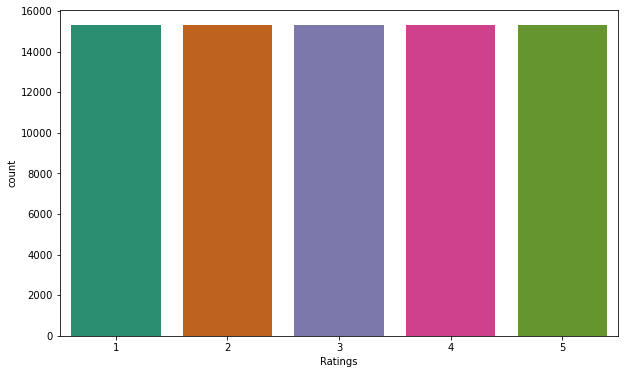

In [66]:
# Visualizing the data after oversampling
plt.figure(figsize=(10,6))
sns.countplot(y_train_os,palette="Dark2")
plt.show()

As we can observe all the categories in the target variable "Ratings" have equal values. The class imbalancing issue has been solved. Now we can build our machine learning models.

In [77]:
# Creating instances for different Classifiers

mnb = MultinomialNB()
SVC = LinearSVC()
SGD = SGDClassifier()
DTC = DecisionTreeClassifier()


# Creating a list model where all the models will be appended for further evaluation in loop.
models=[]
models.append(('MultinomialNB',mnb))
models.append(('LinearSVC',SVC))
models.append(('SGDClassifier',SGD))
models.append(('DecisionTreeClassifier',DTC))

I have created 4 different classification algorithms and are appended in the variable models. Now, let's run a for loop which contains the accuracy of the models along with different evaluation metrics.

In [78]:
# Creating empty lists
Model = []
Acc_score = []
cvs = []

for name,model in models:
    print("******************************",name,"******************************")
    print("\n")
    Model.append(name)
    model.fit(x_train_os,y_train_os)
    print(model)
    y_pred=model.predict(x_test)
# Accuracy Score
    acc_score=accuracy_score(y_test,y_pred)*100
    print('Accuracy_Score: ',acc_score)
    Acc_score.append(acc_score)
# Cross Validation Score
    cv=cross_val_score(model,X,y,cv=5,scoring='accuracy').mean()*100
    print('Cross Validation Score: ',cv)
    cvs.append(cv)
# Confusion Matrix
    print('Confusion matrix: \n')
    cm=confusion_matrix(y_test,y_pred)
    print(cm)
    print("\n")
# Classification Report
    print('Classification Report:\n ')
    print(classification_report(y_test,y_pred))

****************************** MultinomialNB ******************************


MultinomialNB()
Accuracy_Score:  82.60711427947915
Cross Validation Score:  76.47047115982915
Confusion matrix: 

[[2981   43   52   73  235]
 [  35  449   10   19   70]
 [  37    7  760   83  185]
 [  94    8   22 1431  616]
 [ 293   27   55  427 5735]]


Classification Report:
 
              precision    recall  f1-score   support

           1       0.87      0.88      0.87      3384
           2       0.84      0.77      0.80       583
           3       0.85      0.71      0.77      1072
           4       0.70      0.66      0.68      2171
           5       0.84      0.88      0.86      6537

    accuracy                           0.83     13747
   macro avg       0.82      0.78      0.80     13747
weighted avg       0.82      0.83      0.82     13747

****************************** LinearSVC ******************************


LinearSVC()
Accuracy_Score:  86.84803957227031
Cross Validation Score:  76.37

# Model Selection

In [79]:
### Displaying Scores and metrics:
Results=pd.DataFrame({'Model': Model,'Accuracy_Score': Acc_score,
                      'Cross_Validation_Score':cvs}) 
Results

,Model,Accuracy_Score,Cross_Validation_Score
0,MultinomialNB,82.607114,76.470471
1,LinearSVC,86.848040,76.376796
2,SGDClassifier,83.800102,78.268874
3,DecisionTreeClassifier,86.193351,73.013879


### Observation:
Thus we see that after modelling different classification algorithms,We choose SGDClassifier as the best fitting model as the difference between accuracy and cross validation score is less among other models.Now ,we will try Hyperparameter Tuning to find out the best parameters and using them to improve the scores and metrics values.

### Hyper Parameter Tuning

In [84]:
# Let's Use the GridSearchCV to find the best paarameters in SGDClassifier

parameters= {'n_jobs':[-1,None],
              'penalty':['l2'],
              'alpha':[0.0001,0.0005]}
GCV=GridSearchCV(SGDClassifier(),parameters,cv=5) 

In [85]:
# Training the best model
GCV.fit(x_train_os,y_train_os)

GridSearchCV(cv=5, estimator=SGDClassifier(),
             param_grid={'alpha': [0.0001, 0.0005], 'n_jobs': [-1, None],
                         'penalty': ['l2']})

In [86]:
#Getting best parameters
GCV.best_params_  

{'alpha': 0.0001, 'n_jobs': -1, 'penalty': 'l2'}

Thus we find the best parameters of SGD Classifier as above.

### Building final model

In [87]:
# Creating final model 
rat_model = SGDClassifier(alpha=0.0001,n_jobs=-1, penalty='l2')
rat_model.fit(x_train_os, y_train_os)
pred = rat_model.predict(x_test)
acc_score = accuracy_score(y_test,pred)
print("Accuracy score:", acc_score*100)
print('Confusion Matrix: \n',confusion_matrix(y_test,pred))
print('\n')
print('Classification Report:','\n',classification_report(y_test,pred))

Accuracy score: 84.7239397686768
Confusion Matrix: 
 [[3110   80   31   54  109]
 [  39  500    8   11   25]
 [  37   12  859   66   98]
 [  88   11   43 1561  468]
 [ 285   63   82  490 5617]]


Classification Report: 
               precision    recall  f1-score   support

           1       0.87      0.92      0.90      3384
           2       0.75      0.86      0.80       583
           3       0.84      0.80      0.82      1072
           4       0.72      0.72      0.72      2171
           5       0.89      0.86      0.87      6537

    accuracy                           0.85     13747
   macro avg       0.81      0.83      0.82     13747
weighted avg       0.85      0.85      0.85     13747



Thus we have succesfully applied the hyperparameter tuning using gridsearchcv and founf out the best parametrs of the SGDClassifier and the accuracy of the model has been increased after hyperparameter tuning and received the accuracy score as 85% which is very good.

### Confusion Matrix

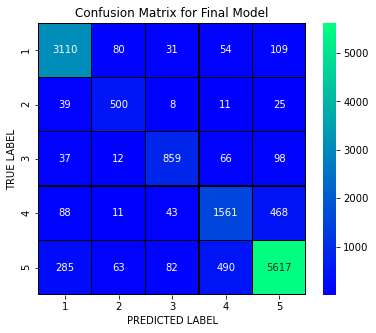

In [90]:
# Plot confusion matrix heatmap
cm = confusion_matrix(y_test,pred)

x_axis_labels = ["1","2","3","4","5"]
y_axis_labels = ["1","2","3","4","5"]

f , ax = plt.subplots(figsize=(6,5))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="winter",
            xticklabels=x_axis_labels,yticklabels=y_axis_labels)

plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Final Model')
plt.show()

With the help of confusion matrix we can able to see actual and predicted values for the final model. And also we can understand the number of times we got the correct outputs and the number of times my model missed to provide the correct prediction.

### Saving The Model

In [91]:
# Saving the model using .pkl
import joblib
joblib.dump(rat_model,"Review_Ratings.pkl")

['Review_Ratings.pkl']

Using the joblib option to save the final classification model in the form of .pkl.

### Loading and Predicting the Saved Model

In [94]:
# loading the final model
model = joblib.load('Review_Ratings.pkl')

# Creating dataframe for predicted results
predict=pd.DataFrame([model.predict(X)[:]],index=["Predicted"])
predict.T

,Predicted
0,5
1,5
2,5
3,5
4,4
...,...
45818,1
45819,5
45820,2
45821,3


Thus after saving the loaded model,i used it for prediction test for reviews ratings. Using classification model, we have got the predicted values for review ratings.

# Saving the Predictions

In [95]:
# Saving the predicted values
predict.to_csv('Rating_Predic_Values.csv')

### Conclusion

This case study is an example of NLP using machine learning. In this case study,We have applied various NLP text processing techniques along with EDA.

From this dataset we were able to understand the idea of Natural Language Processing using machine learning models. This model helps us to understand the ratings of the products. On the basis of product review ratings one can be aware of the positive and negatine review of the products and thereby be extra precautioned in buying that product. 

First we collected the dataset from the websites www.flipkart.com and www.amazon.com which is a web platform where the people can purchase their products. The data is scraped using Web scraping technique and the framework used is Selenium. We scrapped and fetched the data for different products like laptops, smart watches, phones etc. and saved the collected data in csv format. The dimension of the dataset is 45931 and 3 columns having target variable “Ratings” and unammed 0 column which needs to be deleted. Then we loaded the dataset and have done data cleaning, EDA process and text pre-processing techniques like:

1)Text case conversion

2)Removing Punctuations and other special characters

3)Splitting the comments into individual words

4)Removing Stop Words

5)Stemming and Lemmatization

6)Text Standardization-Normalization

Then we did the model training, building the model and finding out the best model on the basis of different metrices like Accuracy Score, Cross Validation Score, precision, recall, f1score. We have created 4 different models. 

Thus We found that SGDClassifier as the best model among all the models as it was giving least difference of accuracy and cv score. On this basis we performed the Hyperparameter tuning to finding out the best parameter and improving the scores. The accuracy score increased after tuning. So we concluded that SGDClassifier as the best algorithm as it was giving high accuracy.
After that we saved the model in a pickle with a filename in order to use whenever we require. Then we loaded the saved file and predicted the values for test data. Further we saved the predicted values test data into csv file.